In [42]:
import hurst
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
import rwi
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  r2_score, mean_squared_error,  explained_variance_score, accuracy_score, f1_score, roc_auc_score

In [44]:
def generateSeries(p_, lk):
    ts = hurst.random_walk(10000, proba=p_,  min_lookback=lk, max_lookback=lk,)
    ts = (1000+pd.Series(ts)).dropna()
    df_ = pd.DataFrame(ts, columns=['price'])
    df_ = rwi.generate_features(df_).dropna()
    df_['shift_returns'] = df_['returns'].shift(-1)
    df_.dropna(inplace=True)
    return df_

In [45]:
df = generateSeries(0.7, 50)

In [46]:
hurst

<module 'hurst' from 'C:\\Users\\lexik\\.conda\\envs\\quant\\lib\\site-packages\\hurst\\__init__.py'>

In [47]:
regression(df)

(0.7587859424920127, 0.6465965926539876)

In [52]:
"""
can add Harris research
vectorized backtesting and momersion strategies


"""

'\ncan add Harris research\nvectorized backtesting and momersion strategies\n\n\n'

In [100]:
trend = []
for i in range(0, 1000):
    df = generateSeries(0.7, 50)
    f1, auc = regression(df)
    hurst_val = rwi.hurst(df[['price']])[0]
    trend.append((i, hurst_val, f1, auc))

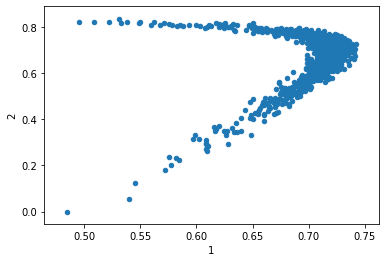

In [101]:
pd.DataFrame(trend)[[1, 2, 3]].plot.scatter(x=1, y=2)

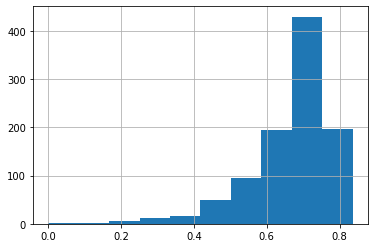

In [102]:
pd.DataFrame(trend)[2].hist()

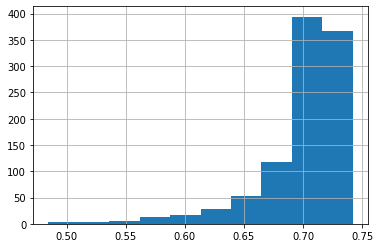

In [103]:
pd.DataFrame(trend)[1].hist()

In [104]:
mr = []
for i in range(0, 1000):
    df = generateSeries(0.3, 50)
    f1, auc = regression(df)
    hurst_val = rwi.hurstF(df[['price']])[0]
    mr.append((i, hurst_val, f1, auc))

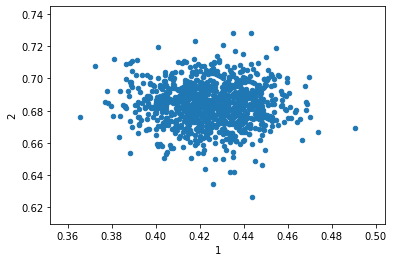

In [105]:
pd.DataFrame(mr)[[1, 2, 3]].plot.scatter(x=1, y=2)

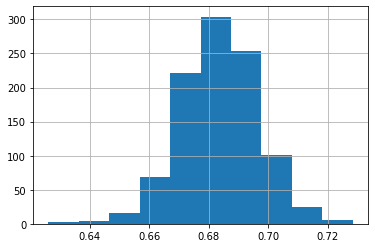

In [106]:
pd.DataFrame(mr)[2].hist()

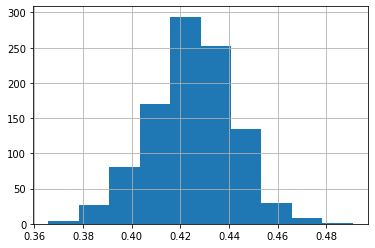

In [107]:
pd.DataFrame(mr)[1].hist()

In [108]:
rand = []
for i in range(0, 1000):
    df = generateSeries(0.5, 50)
    f1, auc = regression(df)
    hurst_val = rwi.hurstF(df[['price']])[0]
    rand.append((i, hurst_val, f1, auc))

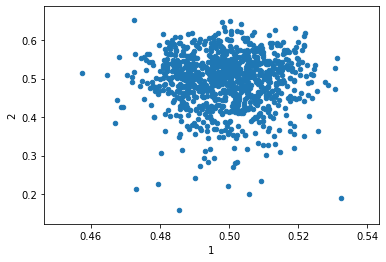

In [109]:
pd.DataFrame(rand)[[1, 2, 3]].plot.scatter(x=1, y=2)

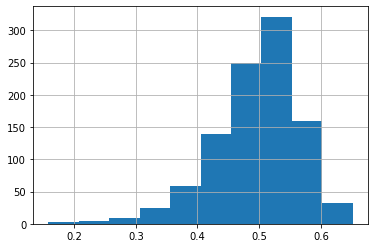

In [110]:
pd.DataFrame(rand)[2].hist()

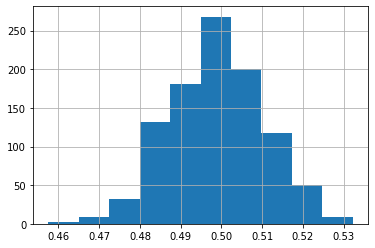

In [111]:
pd.DataFrame(rand)[1].hist()

In [115]:
trend_df = pd.DataFrame(trend)
mr_df = pd.DataFrame(mr)
rand_df = pd.DataFrame(rand)

In [119]:
rand_df

0         1         2         3
0      0  0.487312  0.461883  0.493240
1      1  0.483317  0.487884  0.499217
2      2  0.509677  0.424127  0.522274
3      3  0.500408  0.600507  0.502888
4      4  0.494545  0.508247  0.498139
..   ...       ...       ...       ...
995  995  0.487998  0.405886  0.493717
996  996  0.492073  0.539592  0.487432
997  997  0.490369  0.499480  0.494331
998  998  0.512365  0.520367  0.504211
999  999  0.525710  0.363027  0.502499

[1000 rows x 4 columns]

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

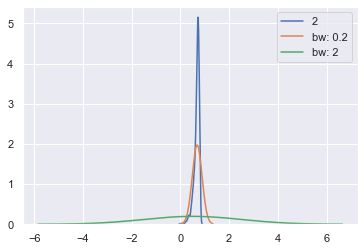

In [120]:
sns.kdeplot(trend_df[2])
sns.kdeplot(mr_df[2], bw=.2, label="bw: 0.2")
sns.kdeplot(rand_df[2], bw=2, label="bw: 2")
plt.legend();

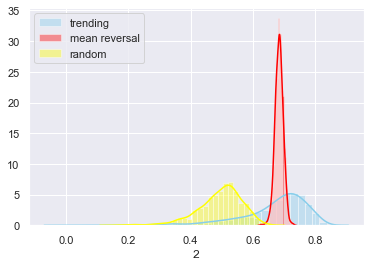

In [124]:
sns.distplot( trend_df[2] , color="skyblue", label="trending")
sns.distplot( mr_df[2] , color="red", label="mean reversal")
sns.distplot( rand_df[2] , color="yellow", label="random")
plt.legend();

In [132]:
all_list = []
for i in range(0, 1000):
    df = generateSeries(random.uniform(0.0, 1.0), 50)
    f1, auc = regression(df)
    hurst_val = rwi.hurstF(df[['price']])[0]
    all_list.append((i, hurst_val, f1, auc))

In [127]:
import random

In [140]:
sns.set(rc={'figure.figsize':(20,15)})

In [146]:
sns.set_context("paper", font_scale=2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 1440x1080 with 0 Axes>

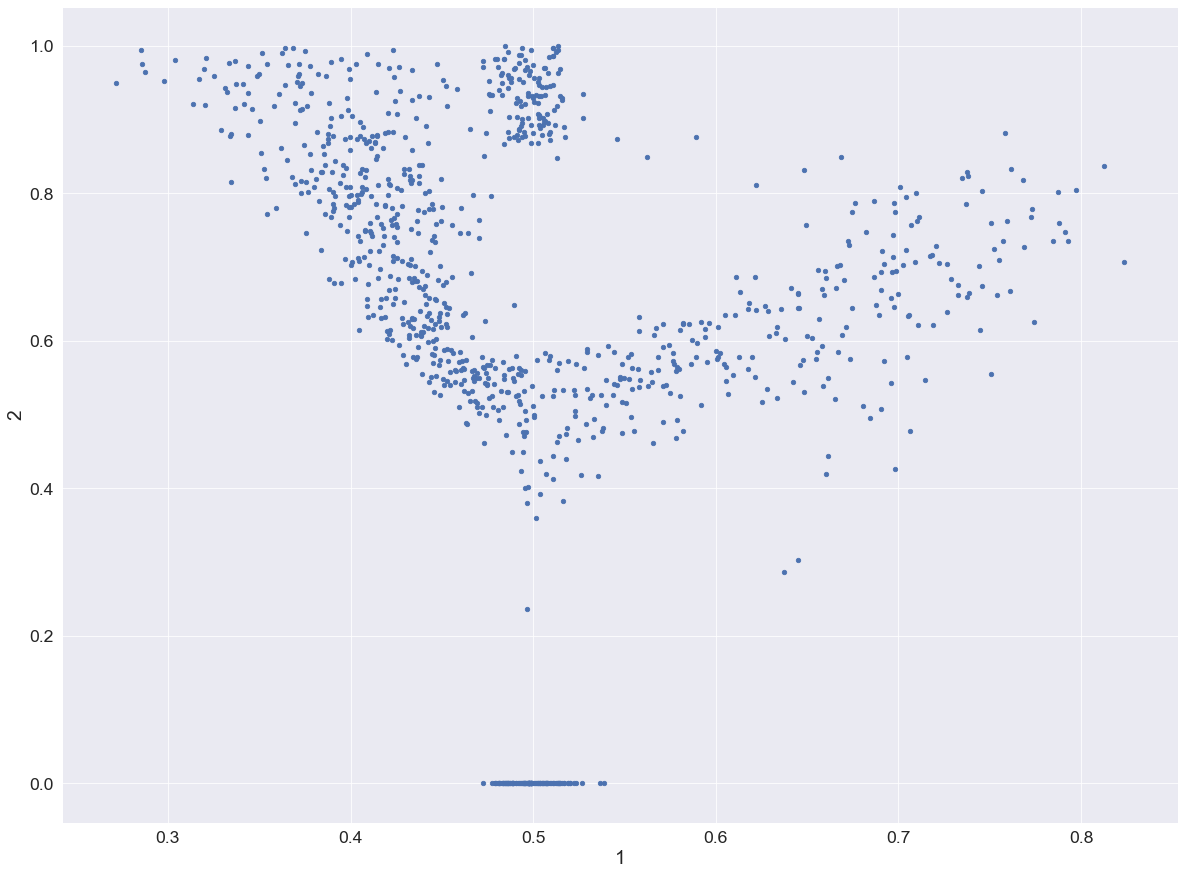

<Figure size 1440x1080 with 0 Axes>

In [147]:

pd.DataFrame(all_list)[[1, 2, 3]].plot.scatter(x=1, y=2)
plt.figure(figsize=(20,15))

In [27]:
def regression(df_):
    df_ = df_[df_.returns != 0.0]
    
    X_ = df_.drop(columns=['shift_returns', 'price']) #  'returns', 'ROC_2', 'ROC_3'
    y_ = np.sign(df_['shift_returns'])
    X_train, X_test, y_train, y_test = train_test_split( X_, y_, test_size=0.20, random_state=42)
    
    model = LogisticRegression(max_iter = 1000) #Lasso(alpha=0.01)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)
    return (f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

In [367]:
# https://www.pythonforfinance.net/2016/05/09/python-backtesting-mean-reversion-part-2/

In [368]:
def rollingRegression(X_, y_):
    X_train_, X_test_, y_train_, y_test_ = train_test_split( X_, y_, test_size=0.20, random_state=42)
    
    model = LogisticRegression(max_iter = 500) #Lasso(alpha=0.01) #Lasso(alpha=0.01)
    model.fit(X_train_, y_train_)
    y_pred_ = model.predict(X_test_)
    return f1_score(y_pred_, y_test_)

In [369]:
df.shape

(9499, 11)

In [370]:
p = 100
chunk =100
res = []
for i in range(p, len(df)-1): # 
    
    X_rol= X.iloc[p:p+chunk]
    y_rol = y.iloc[p:p+chunk]
    if len(X_rol) !=0:
        res.append(rollingRegression(X_rol, y_rol))

    p+=chunk
    

In [276]:
"""
- Logistic Market model
- controlled experiment
- controlled experiemtn 2
- market predictability. Hurst, Correlations
- Practical application: 1) ML model, 2) hurst + MA
- Market Regimes

- Quant portfolio
- 

"""

'\n- Logistic Market model\n- controlled experiment\n- controlled experiemtn 2\n- market predictability. Hurst, Correlations\n- Practical application: 1) ML model, 2) hurst + MA\n- Market Regimes\n\n- Quant portfolio\n- \n\n'